In [2]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [3]:
 link = "G:/Machine learning with python/nba_logreg.csv"
data = pd.read_csv(link)
#specification of input and output variables 
X = data.iloc[:, 16:20].values  
y = data.iloc[:, 20].values
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% trainset and 20% tes
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
rf_y_pred=clf.predict(X_test)
accu_rf=metrics.accuracy_score(y_test, rf_y_pred)
accu_rf

0.5597014925373134

In [5]:
# for loop for performance prediction

link = "G:/Machine learning with python/nba_logreg.csv"
data = pd.read_csv(link)
    #specification of input and output variables 
X = data.iloc[:, 16:20].values  
y = data.iloc[:, 20].values
k=1000
mc = np.zeros(6)
for j in range(1,1000):
    result_array = np.array([])
    ratio=[0.4,0.5,0.6,0.7,0.8,0.9]
    for i in ratio:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=0)  
        clf=RandomForestClassifier(n_estimators=100)
        clf.fit(X_train,y_train)
        rf_y_pred=clf.predict(X_test)
        accu_rf=metrics.accuracy_score(y_test, rf_y_pred)
        result_array = np.append(result_array, accu_rf)
    mc=mc+(1/k)*result_array
    
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


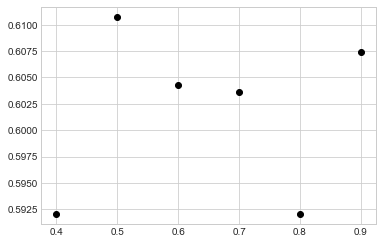

In [7]:
# performance plot 

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(ratio, mc, 'o', color='black');

In [27]:
 clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)
feat_labels=['AST','STL','BLK','TOV']
# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('AST', 0.2985163626607853)
('STL', 0.2070411583889008)
('BLK', 0.23635659193185493)
('TOV', 0.2580858870184553)


In [29]:
#Identify And Select Most Important Features
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(clf, threshold=0.25)

# Train the selector
sfm.fit(X_train, y_train)
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])
    
    

AST
TOV


In [ ]:

# Comparison of full model versus reduced model
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

In [31]:
#Monte Carlo runs for different ratios for comparing full model versus reduced model
link = "G:/Machine learning with python/nba_logreg.csv"
data = pd.read_csv(link)
    #specification of input and output variables 
X = data.iloc[:, 16:20].values  
y = data.iloc[:, 20].values
k=1000
mc = np.zeros(12)
for j in range(1,10):
    result_array = np.array([])
    ratio=[0.4,0.5,0.6,0.7,0.8,0.9]
    for i in ratio:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=0)  
        clf=RandomForestClassifier(n_estimators=100)
        clf.fit(X_train,y_train)
        rf_y_pred=clf.predict(X_test)
        accu_rf=metrics.accuracy_score(y_test, rf_y_pred)
        # Comparison of full model versus reduced model
       
    
        X_important_train = sfm.transform(X_train)
        X_important_test = sfm.transform(X_test)

         # Create a new random forest classifier for the most important features
        clf_important = RandomForestClassifier(n_estimators=10000, random_state=0)

        # Train the new classifier on the new dataset containing the most important features
        clf_important.fit(X_important_train, y_train)
        # Apply The Full Featured Classifier To The Test Data
        y_important_pred = clf_important.predict(X_important_test)

        # View The Accuracy Of Our Limited Feature (2 Features) Model
        acc_reduced=accuracy_score(y_test, y_important_pred)



        result_array = np.append(result_array, [accu_rf,acc_reduced])
    mc=mc+(1/k)*result_array
  

In [32]:
mc

array([0.00534142, 0.00545709, 0.00550597, 0.00537313, 0.00545274,
       0.00520522, 0.00544563, 0.00528678, 0.00533022, 0.00514646,
       0.00546932, 0.00545522])